# Bike Sharing Demand

## Forecast use of a city bikeshare system

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.


The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.


By harnessing the power of regression algorithms, this project aims to predict the total count of bikes rented during each hour covered by the test set, based on only information available before the rental period. By evaluating the performance of different regression models using the Root Mean Squared Logarithmic Error (RMSLE), we will select the most accurate model that best captures the underlying relationships within the data.

Ultimately, the goal of this project is to not only develop a reliable prediction model but also through a comprehensive analysis of the dataset, this project seeks to unearth meaningful insights about the factors influencing bike rentals. These insights could potentially aid stakeholders in making informed decisions to optimize bike availability, marketing strategies, and resource allocation.

For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month.

You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period



### Understanding the Variables

datetime: hourly date + timestamp
Clear, Few clouds, Partly cloudy, Partly cloudy

season:

    1 = spring   
    2 = summer
    3 = fall
    4 = winter
holiday: whether the day is considered a holiday,
      1 = holiday 
      0 = not holiday
workingday: whether the day is neither a weekend nor holiday
         1 = working day 
         0 = not working day
weather:
     1 = Clear, Few clouds, Partly cloudy, Partly cloudy
     2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp: temperature in Celsius

atemp: "feels like" temperature in Celsius

humidity: relative humidity

windspeed: wind speed

casual: number of non-registered user rentals initiated

registered: number of registered user rentals initiated

count: number of total rentals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', parse_dates = ['datetime'])
df_test = pd.read_csv('test.csv', parse_dates = ['datetime'])

In [3]:
df.head(25)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
def add_features(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['hour'] = df['datetime'].dt.hour

In [5]:
add_features(df)
add_features(df_test)

In [6]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
dayofweek              int64
hour                   int64
dtype: object

array([[<Axes: title={'center': 'count'}>]], dtype=object)

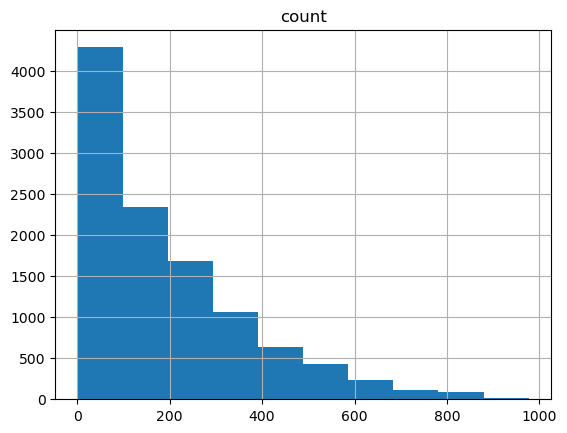

In [9]:
df.hist(column='count')

We can see that the target variable Count is skewed so we will apply log transformation to the count variable into log(count + 1) since distribution of counts is skewed.

In [10]:
df["count"] = df["count"].map(np.log1p)

In [11]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


array([[<Axes: title={'center': 'count'}>]], dtype=object)

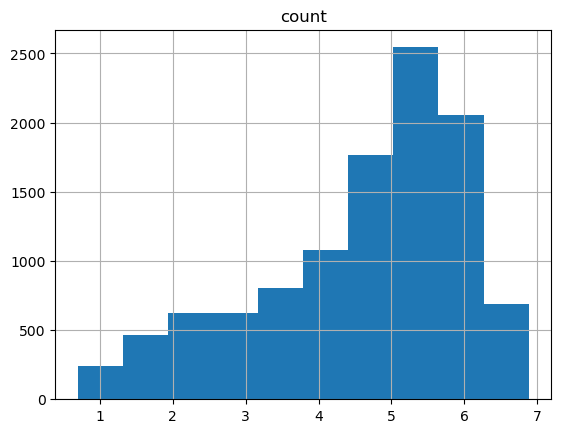

In [12]:
df.hist(column='count')

In [13]:
group_hour = df.groupby(['hour'])
avg_by_hour = group_hour['count'].mean()

Text(0.5, 1.0, 'Rental count average by hour')

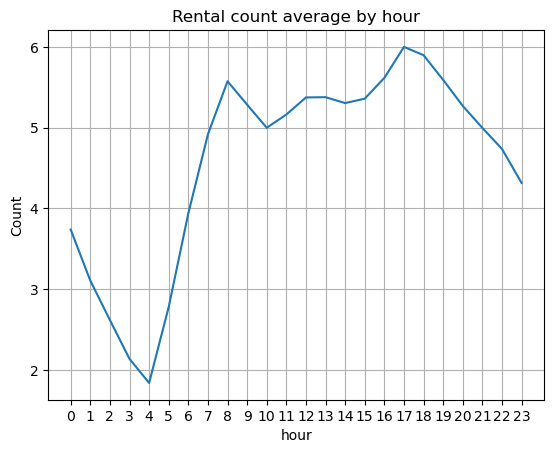

In [14]:
plt.plot(avg_by_hour.index, avg_by_hour)
plt.xlabel('hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Rental count average by hour')

In [15]:
df.corr()['count']

C:\Users\CHETAN\AppData\Local\Temp\ipykernel_6852\471646074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']


season        0.160452
holiday      -0.001231
workingday   -0.015326
weather      -0.108005
temp          0.376587
atemp         0.372167
humidity     -0.333158
windspeed     0.122754
casual        0.579034
registered    0.792129
count         1.000000
year          0.178236
month         0.163731
day           0.019008
dayofweek     0.027265
hour          0.570638
Name: count, dtype: float64

We will exclude the casual and registered columns from the final dataset since they have high correlation with count, our target variable

In [16]:
group_yr_hour = df.groupby(['year', 'hour'])
avg_by_yr_hour = group_yr_hour['count'].mean()

In [17]:
print(avg_by_yr_hour)

year  hour
2011  0       3.502060
      1       2.891321
      2       2.473136
      3       2.007282
      4       1.686262
      5       2.486522
      6       3.662822
      7       4.618962
      8       5.276212
      9       4.999673
      10      4.719866
      11      4.862747
      12      5.082646
      13      5.086519
      14      5.020945
      15      5.056894
      16      5.326948
      17      5.729295
      18      5.619503
      19      5.306056
      20      4.992485
      21      4.729681
      22      4.476463
      23      4.061601
2012  0       3.971435
      1       3.316618
      2       2.755444
      3       2.256099
      4       1.980326
      5       3.066929
      6       4.213505
      7       5.215524
      8       5.872845
      9       5.568828
      10      5.276638
      11      5.461930
      12      5.667054
      13      5.668790
      14      5.588674
      15      5.662563
      16      5.907332
      17      6.272040
      18      6.176945


Text(0.5, 1.0, 'Rental Count avg by Year, Hour')

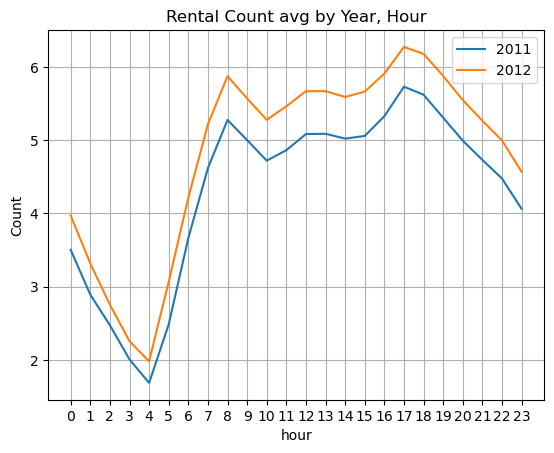

In [18]:
for year in avg_by_yr_hour.index.levels[0]:
    #print(avg_by_yr_hour[year])
    plt.plot(avg_by_yr_hour[year].index, avg_by_yr_hour[year], label=year)
    
plt.legend()
plt.xlabel('hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Rental Count avg by Year, Hour')

In [19]:
group_workingday_hour = df.groupby(['workingday', 'hour'])
avg_by_workingday_hour = group_workingday_hour['count'].mean()

Text(0.5, 1.0, 'Rental Count avg by Workingday, Hour')

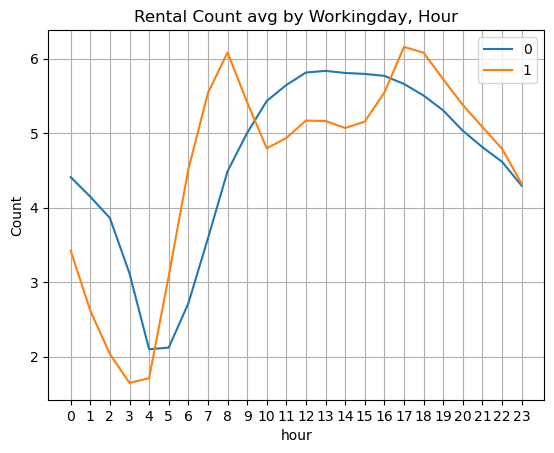

In [20]:
for workingday in avg_by_workingday_hour.index.levels[0]:
    #print(avg_by_yr_hour[year])
    plt.plot(avg_by_workingday_hour[workingday].index, avg_by_workingday_hour[workingday], label=workingday)
    
plt.legend()
plt.xlabel('hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Rental Count avg by Workingday, Hour')

In [21]:
# Sagemaker built-in algorithms require datasets where the first feature is the label or target (y) 
# and the rest are independent variables (X).
# We need to concatenate the y and X to create the dataset in the expected format and order and save it locally as a CSV file.

columns = ['count','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day'
           ,'dayofweek','hour']

In [22]:
df.to_csv('bike_all.csv', index= False, columns = columns)

In [23]:
# Training = 70% of train data
# validation = 30% of train data

np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [24]:
rows = df.shape[0]
train = int(.7 * rows)
test = int(.3 * rows)

In [25]:
rows, train, test

(10886, 7620, 3265)

In [26]:
columns = ['count','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day'
           ,'dayofweek','hour']

In [27]:
df[:train].to_csv('bike_train.csv', index = False, header= False, columns = columns)
df[train:].to_csv('bike_val.csv', index = False, header= False, columns = columns)
df_test.to_csv('bike_test.csv', index = False)

In [28]:
','.join(columns)

'count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour'

In [29]:
# Write Columns List
with open('bike_train_column_list.txt', 'w') as f:
    f.write(','.join(columns))